In [266]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

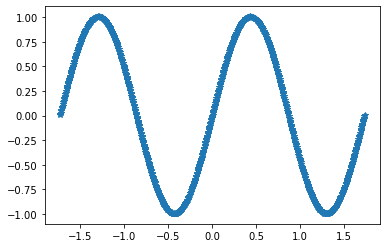

In [267]:
nPoint = 1000
X1d = np.linspace(0,4*np.pi, nPoint)
y = np.sin(X1d) + np.random.random((nPoint,))/100

X2d = X1d[..., np.newaxis]

sc = StandardScaler()

X2d_std = sc.fit_transform(X2d)

fig, ax = plt.subplots()
ax.plot(X2d_std,y,'*--')

In [268]:
tf.keras.backend.clear_session()
layerIn = Input(shape=(1,))

layerMid = layerIn
for _ in range(4):
    layerMid = Dense(256,activation='relu', kernel_initializer='normal')(layerMid)

layerOut = Dense(1, kernel_initializer='normal')(layerMid)

model = Model(inputs=layerIn, outputs=layerOut)

model.summary()

# model.compile(
#     optimizer=tf.optimizers.Adam(learning_rate=0.1),
#     loss='mean_absolute_error', metrics=['mean_absolute_error'])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')

history = model.fit(X2d_std,y,epochs=1000)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 256)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 198,145
Trainable params: 198,145
Non-trainable params: 0
_______________________________________________________

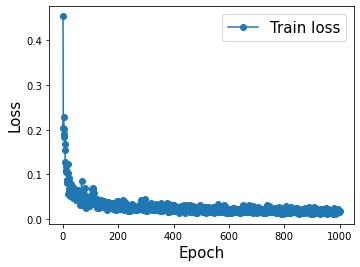

In [269]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)

plt.show()

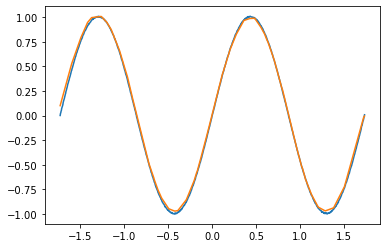

In [270]:
y_pred = model(X2d_std)
fig ,ax = plt.subplots()
ax.plot(X2d_std,y)
ax.plot(X2d_std,y_pred)